In [104]:
# IMPORTS
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
import json
# https://stackoverflow.com/questions/9401658/how-to-animate-a-scatter-plot

In [105]:
def get_frame_dot(fidx, json_object):
    dot1 = []
    for idx in range(0, len(json_object['frames'][fidx]["keypoints3D"])):
        landmark = json_object['frames'][fidx]["keypoints3D"][idx]
        dot1.append([landmark['x'], landmark['y'], landmark['z']])
    dot1.append([0.0, 0.0, 0.0])
    return dot1   
def get_frame_dot_with_mark(fidx, json_object):
    dot1 = []
    for idx in range(0, len(json_object['frames'][fidx]["keypoints3D"])):
        landmark = json_object['frames'][fidx]["keypoints3D"][idx]
        dot1.append([landmark['x'], landmark['y'], landmark['z']])
        if idx <= 5: 
          dot1[idx].append('r')
        elif idx <= 11: # left Arm
          dot1[idx].append('g')
        elif idx <= 17: # right Arm
          dot1[idx].append('b')
        elif idx <= 21: # left leg
          dot1[idx].append('k')
        else:
          dot1[idx].append('m')
        dot1[idx].append('o')
    dot1.append([0.0, 0.0, 0.0, 'b', 's'])
    return dot1

In [106]:
json_object = None
file_name = 'mediapipe_json/mixamo_attack.gif.json.json' 
with open(file_name) as f:
    json_object = json.load(f)

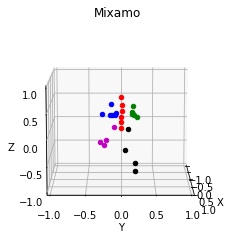

In [107]:
fig = plt.figure()
ax = plt.axes(projection='3d')
frames = min(len(json_object["frames"]), 100)
size = len(json_object["frames"][0]["keypoints3D"])

def update(i):
    ax.clear()
    dot1 = get_frame_dot_with_mark(i, json_object)
    for i in range(0, size):
        ax.scatter(dot1[i][0], dot1[i][1], dot1[i][2], c = dot1[i][3], marker= dot1[i][4])
    ax.set_xlim3d([-1.0, 1.0])
    ax.set_xlabel('X')

    ax.set_ylim3d([-1.0, 1.0])
    ax.set_ylabel('Y')

    ax.set_zlim3d([-1.0, 1.0])
    ax.set_zlabel('Z')

    ax.set_title('Mixamo')
    ax.view_init(10, 0)

ani = animation.FuncAnimation(fig, update, frames=frames, interval=json_object["ticksPerSecond"])
ani.save(file_name +'.gif', writer='pillow')